<a href="https://colab.research.google.com/github/victorananias/alura-machine-learning-001/blob/master/ML_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dataframe = pd.read_csv(uri)
dataframe.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
swap = {
    'no': 0,
    'yes': 1
}

dataframe.sold = dataframe.sold.map(swap)
dataframe.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

current_year = datetime.today().year
dataframe['model_age'] = current_year - dataframe.model_year
dataframe.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dataframe['kilometres_per_year'] = dataframe.mileage_per_year * 1.60934
dataframe.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,kilometres_per_year
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dataframe = dataframe.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis = 1)
dataframe.head()

,price,sold,model_age,kilometres_per_year
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
# LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dataframe[['price', 'model_age', 'kilometres_per_year']]
y = dataframe['sold']

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 62.80%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Dummy strategy='stratified'
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(train_x, train_y)
predictions = dummy_stratified.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia do dummy stratified foi %.2f%%" % accuracy)


A acurácia do dummy stratified foi 52.44%


In [ ]:
# Dummy strategy='most_frequent'
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(train_x, train_y)
predictions = dummy_mostfrequent.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia do dummy most frequent foi %.2f%%" % accuracy)


A acurácia do dummy most frequent foi 58.00%


In [ ]:
# Dummy strategy='stratified' com score

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y)
print("A acurácia do dummy stratified foi %.2f%%" % accuracy)


A acurácia do dummy stratified foi 0.51%


In [ ]:
# SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
# DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = DecisionTreeClassifier(max_depth = 3)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


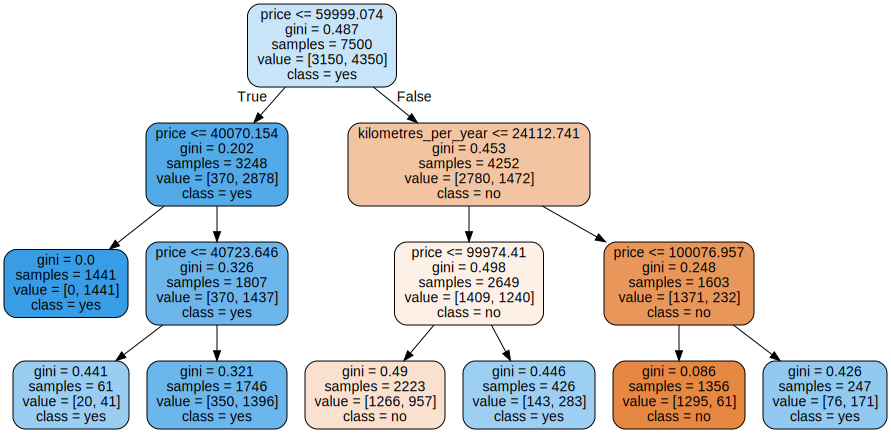

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

features = x.columns

dot_data = export_graphviz(
    model, out_file = None,
    filled = True,
    rounded = True,
    feature_names = features,
    class_names = ['no', 'yes']
)

graph = graphviz.Source(dot_data)
graph